# Original Goal:
Load the data that Erik provided into this python notebook for analysis. Specifically, look at the count of distinct attempts (and optionally experience level) for one skill question (1-1) and one problem-solving question (2-3). Look at the 2016 and 2017 data separately (graph, calculate averages, etc.) and then aggregate them to look for patterns on a more macro scale.

Question 1-1 is a skill-based question in which the user is writes a short code that counts and prints the number of vowels in a string.

Question 2-3 is a problem-solving question that requires the user to write a code that finds the smallest monthly payment that an individual can pay per month that would allow them to pay off their debt in a year given a specificed interest rate. This question focuses on using a bisection technique to speed up code written in the previous question in this problem set. 

*Now Extend to all questions*

# Some Potential Research Questions

-Is there one coder-experience group that significantly outperforms all other groups in the course in regard to skill-based questions? Problem-solving questions? Both?

-How do number of attempts vary as the course progesses? Down because people are giving up? Down because they are more experienced? Up because the problems are harder? Down for certain groups, up for others?

-Can we identify a turning point? (point where we can observe a potentially significant shift in attempts and/or accuracy)

In [1]:
#need to add 'data/clickstream/csv' before all .cvs filenames

In [2]:
# Load the Pandas library with alias 'pd'
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Name data file
from Data import *

In [3]:
# Specify columns and path
cols = [0, 2, 4, 5]

path_to_files = 'data/clickstream/csv/'

In [4]:
#2016 Data for each question grouped by user experience 
df = []

for count in range(len(data_2016)):
    df = pd.read_csv(path_to_files + data_2016[count], index_col=0, usecols=cols)
   # print(df.head(), "\n")
   # print(data_2016[count], '\n')
   # print(df.groupby(['user_exp']).mean(), '\n')

In [5]:
#2017 Data for each question grouped by user experience 

for count in range(len(data_2017)):
    df = pd.read_csv(path_to_files + data_2017[count], index_col=0, usecols=cols)

In [6]:
#2016 AND 2017 Data for each question grouped by user experience (concatenated data)

store_data = pd.DataFrame()

for count in range(len(data_agg)):
    df_1 = pd.read_csv(path_to_files + data_years[0] + data_agg[count], index_col=0, usecols=cols)     
    df_2 = pd.read_csv(path_to_files + data_years[1] + data_agg[count], index_col=0, usecols=cols)
    DF = df_1.append(df_2)
    DF.insert(2, "question", data_agg[count], True) 
    
    store_data = pd.concat([store_data, DF], axis = 0, sort = False)
store_data = store_data.reset_index()

#rank sum / diff column / descript.

# 2016 and 2017 COMBINED User Exp / Accuracy / Attempts

In [7]:
one_2016= path_to_files + '2016_unit2_pb3_history.csv'
one_2017= path_to_files + '2017_unit2_pb3_history.csv'

summ = ((pd.read_csv(one_2016, index_col=0, usecols=cols), (pd.read_csv(one_2017, index_col=0, usecols=cols))))
#print(summ)
print (1919+1257) #11
print (1858+1369) #23
print (1330+1771) #47
#so that i know file combination function is working

3176
3227
3101


In [8]:
store_data_grouped_distinct = store_data.groupby(['user_exp', 'question'])['num_distinct'].mean()
store_data_grouped_distinct = store_data_grouped_distinct.reset_index()

store_data_grouped_correct = store_data.groupby(['user_exp', 'question'])['final_correct_bool'].mean()
store_data_grouped_correct = store_data_grouped_correct.reset_index()

store_data_grouped_correct.head(2)

,user_exp,question,final_correct_bool
0,absolutely_none,_unit1_pb1_history.csv,0.992318
1,absolutely_none,_unit1_pb2_history.csv,0.992537


# Plot Stuff

No handles with labels found to put in legend.


<Figure size 720x360 with 0 Axes>

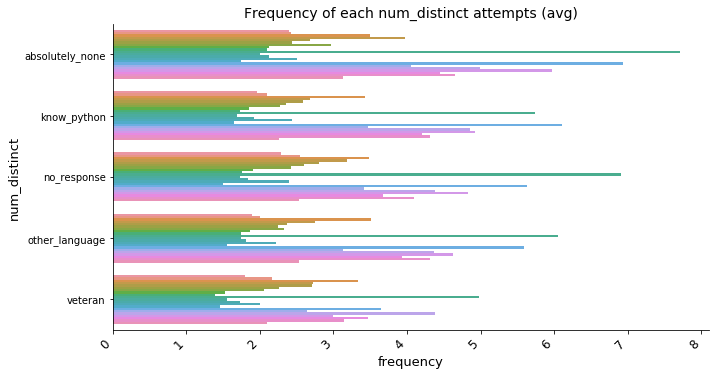

In [9]:
#need to create dataframe with user_exp, correct bool, distinct, and question
#make a horizontal bar plot with side by side data
plt.figure(figsize=(10,5))

sns.catplot(x = 'num_distinct', y = 'user_exp', hue = 'question', 
            data = store_data_grouped_distinct, kind="bar", legend = False, aspect = 2)
plt.title("Frequency of each num_distinct attempts (avg)", fontsize = 14)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('frequency', fontsize=13)
plt.ylabel('num_distinct', fontsize=13)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='large'  
)

plt.show()

No handles with labels found to put in legend.


<Figure size 720x360 with 0 Axes>

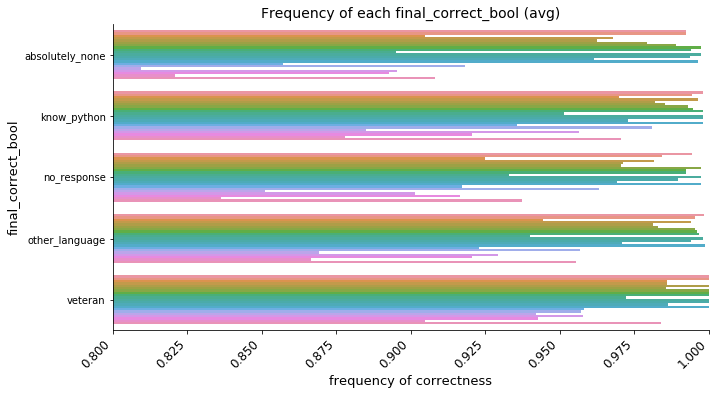

In [10]:
plt.figure(figsize=(10,5))

sns.catplot(x = 'final_correct_bool', y = 'user_exp', hue = 'question', 
            data = store_data_grouped_correct, kind="bar", legend = False, aspect = 2)
plt.title("Frequency of each final_correct_bool (avg)", fontsize = 14)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('frequency of correctness', fontsize=13)
plt.ylabel('final_correct_bool', fontsize=13)
plt.xlim(0.8,1)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='large'  
)

plt.show()

# Create single data frame with all useful info

***What have I done below?***
<br>-created a dataframe with ALL the relevant data combined (user_exp, final_correct_bool, num_distinct, question)
<br>-created a dataframe of descriptive statistics of the final_correct_bool data and the num_distinct data (count, mean, std,	 min, 25%, 50%, 75%, max, delta_mean)
<br>-made plots showing how far away each group (organized from least experience to most (relevant) experience) is from the mean
<br>***What can we (gently) conclude from the data?***
<br>-questions generally do get harder for all groups as the course progresses 
<br>-those with absolutely_none experience generally struggle the most (lots of attempts, lower accuracy, higher std)
<br>-those with veteran and know_python experience typically struggle the least
<br>-at the beginning, accuracy and attempts relatively consistent. however, as the course progresses, the accuracy of each group becomes more variable
<br>-other_language is most abundant group (followed by absolutely_none, know_python, no_response), while veterans are the least abundant
<br>-BOTH plots show a potential turning point of _unit4_pb5_history.csv
<br>-BOTH plots show that _unit3_pb4_history.csv is challenging 



In [11]:
all_data_comb = pd.DataFrame()

for count in range(len(data_agg)):
    df_2016 = pd.read_csv(path_to_files + data_years[0] + data_agg[count], index_col=0, usecols=cols)     
    df_2017 = pd.read_csv(path_to_files + data_years[1] + data_agg[count], index_col=0, usecols=cols)
    DF = df_2016.append(df_2017)
    DF.insert(3, "question", data_agg[count], True) 
    DF.user_exp = pd.Categorical(DF.user_exp, categories=['no_response', 'absolutely_none', 'other_language', 'know_python', 'veteran'])
    DF = DF.sort_values('user_exp')
    
    all_data_comb = pd.concat([all_data_comb, DF], axis = 0, sort = False)

all_data_comb['final_correct_bool'] = all_data_comb['final_correct_bool'].astype(int)
    
print(len(all_data_comb))
all_data_comb.head(3)

67627


,user_exp,final_correct_bool,num_distinct,question
1256,no_response,1,2,_unit1_pb1_history.csv
471,no_response,1,2,_unit1_pb1_history.csv
478,no_response,1,1,_unit1_pb1_history.csv


In [12]:
all_data_desc = all_data_comb.describe().round(4)
all_data_desc_distinct = all_data_comb.groupby(['question','user_exp'])['num_distinct'].describe().round(3)
all_data_desc_correct = all_data_comb.groupby(['question','user_exp'])['final_correct_bool'].describe().round(4)

all_data_desc.head(50)

,final_correct_bool,num_distinct
count,67627.0000,67627.0000
mean,0.9589,3.1230
std,0.1984,3.8286
min,0.0000,1.0000
25%,1.0000,1.0000
50%,1.0000,2.0000
75%,1.0000,3.0000
max,1.0000,54.0000


In [13]:
#descriptive statistics for distinct attempts

all_data_desc_distinct['delta_mean'] = all_data_desc['num_distinct']['mean'] - all_data_desc_distinct['mean'] 
print("Num Distinct Descriptive Statistics")
print("    *delta_mean (positive = less than num_distinct average / required fewer attempts)")
all_data_desc_distinct = all_data_desc_distinct.reset_index()
all_data_desc_distinct.head(5)

Num Distinct Descriptive Statistics
    *delta_mean (positive = less than num_distinct average / required fewer attempts)


,question,user_exp,count,mean,std,min,25%,50%,75%,max,delta_mean
0,_unit1_pb1_history.csv,no_response,363.0,2.289,2.609,1.0,1.0,1.0,2.0,24.0,0.834
1,_unit1_pb1_history.csv,absolutely_none,781.0,2.394,3.048,1.0,1.0,1.0,2.0,28.0,0.729
2,_unit1_pb1_history.csv,other_language,1433.0,1.897,2.095,1.0,1.0,1.0,2.0,27.0,1.226
3,_unit1_pb1_history.csv,know_python,530.0,1.964,1.861,1.0,1.0,1.0,2.0,23.0,1.159
4,_unit1_pb1_history.csv,veteran,69.0,1.797,1.301,1.0,1.0,1.0,2.0,8.0,1.326


In [14]:
#descriptive statistics for correctness

all_data_desc_correct['delta_mean'] = all_data_desc_correct['mean'] - all_data_desc['final_correct_bool']['mean']
print("Correctness Descriptive Statistics")
print("    *delta_mean (positive = less than accuracy average / better accuracy)")
all_data_desc_correct = all_data_desc_correct.reset_index()
all_data_desc_correct.head(5)

Correctness Descriptive Statistics
    *delta_mean (positive = less than accuracy average / better accuracy)


,question,user_exp,count,mean,std,min,25%,50%,75%,max,delta_mean
0,_unit1_pb1_history.csv,no_response,363.0,0.9945,0.0741,0.0,1.0,1.0,1.0,1.0,0.0356
1,_unit1_pb1_history.csv,absolutely_none,781.0,0.9923,0.0874,0.0,1.0,1.0,1.0,1.0,0.0334
2,_unit1_pb1_history.csv,other_language,1433.0,0.9986,0.0373,0.0,1.0,1.0,1.0,1.0,0.0397
3,_unit1_pb1_history.csv,know_python,530.0,0.9981,0.0434,0.0,1.0,1.0,1.0,1.0,0.0392
4,_unit1_pb1_history.csv,veteran,69.0,1.0000,0.0000,1.0,1.0,1.0,1.0,1.0,0.0411


    *delta_mean (positive = less than num_distinct average / required fewer attempts)


<Figure size 1080x720 with 0 Axes>

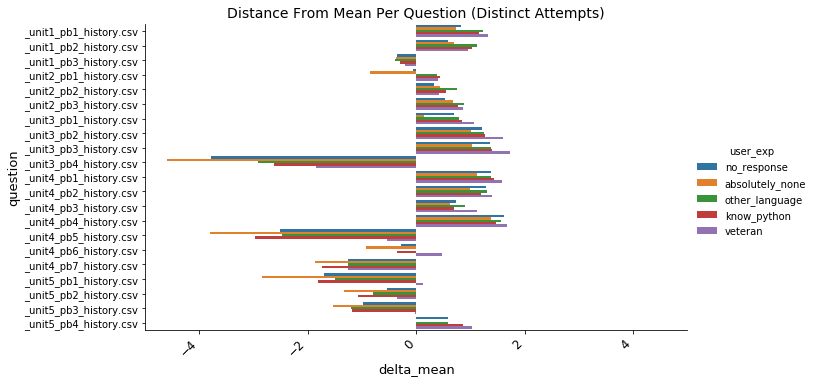

In [15]:
print("    *delta_mean (positive = less than num_distinct average / required fewer attempts)")
plt.figure(figsize=(15,10))

sns.catplot(x = 'delta_mean', y = 'question', hue = 'user_exp', 
            data = all_data_desc_distinct, kind = "bar", legend = True, aspect = 2)
plt.title("Distance From Mean Per Question (Distinct Attempts)", fontsize = 14)
plt.xlabel('delta_mean', fontsize=13)
plt.ylabel('question', fontsize=13)
plt.xlim(-5,5)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='large'  
)

plt.show()

    *delta_mean (negative = greater than accuracy average / worse accuracy)


<Figure size 1080x720 with 0 Axes>

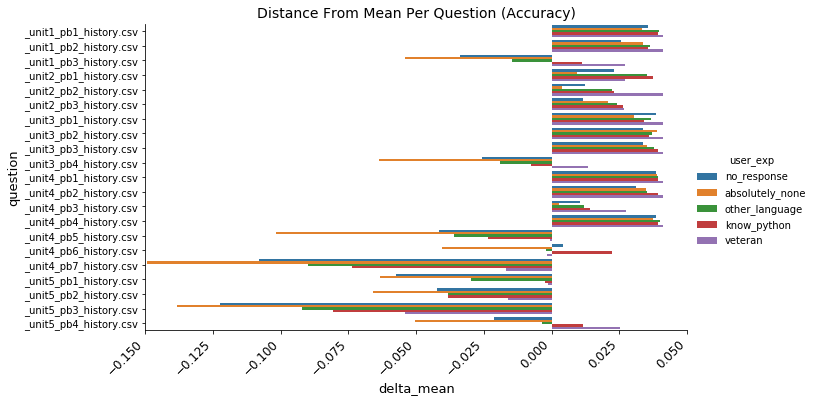

In [16]:
print("    *delta_mean (negative = greater than accuracy average / worse accuracy)")
plt.figure(figsize=(15,10))

sns.catplot(x = 'delta_mean', y = 'question', hue = 'user_exp', 
            data = all_data_desc_correct, kind = "bar", legend = True, aspect = 2)
plt.title("Distance From Mean Per Question (Accuracy)", fontsize = 14)
plt.xlabel('delta_mean', fontsize=13)
plt.ylabel('question', fontsize=13)
plt.xlim(-.15,.05)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='large'  
)

plt.show()

-continue to look @ course questions, figure out what makes them hard (classify!!!!!!)
<br>-group and get rid of (x2) [BELOW]


In [17]:
print(len(all_data_comb))
all_data_comb_3exp = all_data_comb[all_data_comb.user_exp != 'no_response']
all_data_comb_3exp = all_data_comb_3exp.replace(to_replace ="veteran", value ="know_programming") 
all_data_comb_3exp = all_data_comb_3exp.replace(to_replace ="know_python", value ="know_programming") 
all_data_comb_3exp.user_exp = pd.Categorical(all_data_comb_3exp.user_exp, categories=['absolutely_none', 'other_language', 'know_programming'])

print(len(all_data_comb_3exp))
all_data_comb_3exp.head(2)

67627
59745


,user_exp,final_correct_bool,num_distinct,question
1667,absolutely_none,1,2,_unit1_pb1_history.csv
1095,absolutely_none,1,1,_unit1_pb1_history.csv


In [18]:
all_data_desc_3exp = all_data_comb_3exp.describe().round(4)
all_data_desc_distinct_3exp = all_data_comb_3exp.groupby(['question','user_exp'])['num_distinct'].describe().round(3)
all_data_desc_correct_3exp = all_data_comb_3exp.groupby(['question','user_exp'])['final_correct_bool'].describe().round(4)

all_data_desc_3exp.head(10)

,final_correct_bool,num_distinct
count,59745.0000,59745.0000
mean,0.9594,3.1237
std,0.1973,3.8358
min,0.0000,1.0000
25%,1.0000,1.0000
50%,1.0000,2.0000
75%,1.0000,3.0000
max,1.0000,54.0000


In [19]:
#descriptive statistics for distinct attempts (3EXP)

all_data_desc_distinct_3exp['delta_mean'] = all_data_desc_3exp['num_distinct']['mean'] - all_data_desc_distinct_3exp['mean'] 
print("Num Distinct Descriptive Statistics")
print("    *delta_mean (positive = less than num_distinct average / required fewer attempts)")
all_data_desc_distinct_3exp = all_data_desc_distinct_3exp.reset_index()
all_data_desc_distinct_3exp.head(3)

Num Distinct Descriptive Statistics
    *delta_mean (positive = less than num_distinct average / required fewer attempts)


,question,user_exp,count,mean,std,min,25%,50%,75%,max,delta_mean
0,_unit1_pb1_history.csv,absolutely_none,781.0,2.394,3.048,1.0,1.0,1.0,2.0,28.0,0.7297
1,_unit1_pb1_history.csv,other_language,1433.0,1.897,2.095,1.0,1.0,1.0,2.0,27.0,1.2267
2,_unit1_pb1_history.csv,know_programming,599.0,1.945,1.805,1.0,1.0,1.0,2.0,23.0,1.1787


In [20]:
#descriptive statistics for correctness (3EXP)

all_data_desc_correct_3exp['delta_mean'] = all_data_desc_correct_3exp['mean'] - all_data_desc_3exp['final_correct_bool']['mean']
print("Correctness Descriptive Statistics")
print("    *delta_mean (positive = less than accuracy average / better accuracy)")
all_data_desc_correct_3exp = all_data_desc_correct_3exp.reset_index()
all_data_desc_correct_3exp.head(3)

Correctness Descriptive Statistics
    *delta_mean (positive = less than accuracy average / better accuracy)


,question,user_exp,count,mean,std,min,25%,50%,75%,max,delta_mean
0,_unit1_pb1_history.csv,absolutely_none,781.0,0.9923,0.0874,0.0,1.0,1.0,1.0,1.0,0.0329
1,_unit1_pb1_history.csv,other_language,1433.0,0.9986,0.0373,0.0,1.0,1.0,1.0,1.0,0.0392
2,_unit1_pb1_history.csv,know_programming,599.0,0.9983,0.0409,0.0,1.0,1.0,1.0,1.0,0.0389


    *delta_mean (positive = less than num_distinct average / required fewer attempts)


<Figure size 1080x720 with 0 Axes>

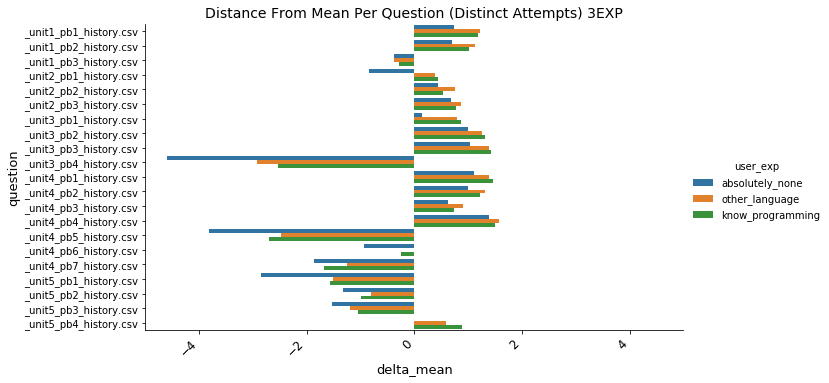

In [21]:
print("    *delta_mean (positive = less than num_distinct average / required fewer attempts)")
plt.figure(figsize=(15,10))

sns.catplot(x = 'delta_mean', y = 'question', hue = 'user_exp', 
            data = all_data_desc_distinct_3exp, kind = "bar", legend = True, aspect = 2)
plt.title("Distance From Mean Per Question (Distinct Attempts) 3EXP", fontsize = 14)
plt.xlabel('delta_mean', fontsize=13)
plt.ylabel('question', fontsize=13)
plt.xlim(-5,5)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='large'  
)

plt.show()

    *delta_mean (negative = greater than accuracy average / worse accuracy)


<Figure size 1080x720 with 0 Axes>

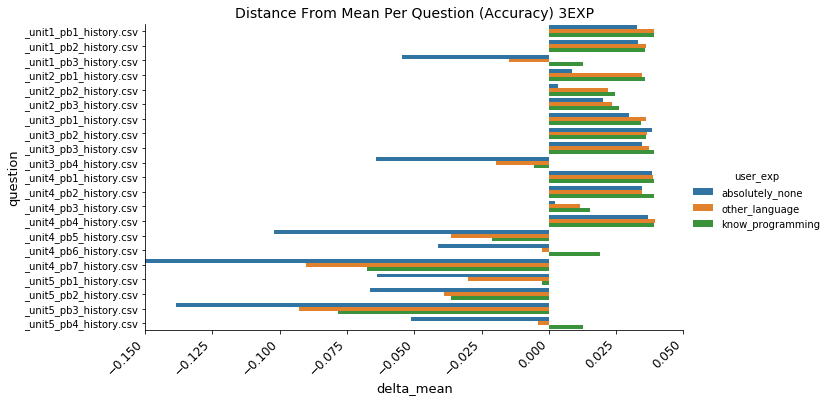

In [22]:
print("    *delta_mean (negative = greater than accuracy average / worse accuracy)")
plt.figure(figsize=(15,10))

sns.catplot(x = 'delta_mean', y = 'question', hue = 'user_exp', 
            data = all_data_desc_correct_3exp, kind = "bar", legend = True, aspect = 2)
plt.title("Distance From Mean Per Question (Accuracy) 3EXP", fontsize = 14)
plt.xlabel('delta_mean', fontsize=13)
plt.ylabel('question', fontsize=13)
plt.xlim(-.15,.05)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='large'  
)

plt.show()

In [23]:
print(len(all_data_comb_3exp))
all_data_comb_2exp = all_data_comb_3exp[all_data_comb_3exp.user_exp != 'no_response']
all_data_comb_2exp = all_data_comb_3exp.replace(to_replace ="other_language", value ="know_programming") 
all_data_comb_2exp.user_exp = pd.Categorical(all_data_comb_2exp.user_exp, categories=['absolutely_none', 'know_programming'])

print(len(all_data_comb_2exp))
all_data_comb_2exp.head(2)

59745
59745


,user_exp,final_correct_bool,num_distinct,question
1667,absolutely_none,1,2,_unit1_pb1_history.csv
1095,absolutely_none,1,1,_unit1_pb1_history.csv


In [24]:
all_data_desc_2exp = all_data_comb_2exp.describe().round(4)
all_data_desc_distinct_2exp = all_data_comb_2exp.groupby(['question','user_exp'])['num_distinct'].describe().round(3)
all_data_desc_correct_2exp = all_data_comb_2exp.groupby(['question','user_exp'])['final_correct_bool'].describe().round(4)

all_data_desc_2exp.head(10)

,final_correct_bool,num_distinct
count,59745.0000,59745.0000
mean,0.9594,3.1237
std,0.1973,3.8358
min,0.0000,1.0000
25%,1.0000,1.0000
50%,1.0000,2.0000
75%,1.0000,3.0000
max,1.0000,54.0000


In [25]:
#descriptive statistics for distinct attempts (2EXP)

all_data_desc_distinct_2exp['delta_mean'] = all_data_desc_2exp['num_distinct']['mean'] - all_data_desc_distinct_2exp['mean'] 
print("Num Distinct Descriptive Statistics")
print("    *delta_mean (positive = less than num_distinct average / required fewer attempts)")
all_data_desc_distinct_2exp = all_data_desc_distinct_2exp.reset_index()
all_data_desc_distinct_2exp.head(2)

Num Distinct Descriptive Statistics
    *delta_mean (positive = less than num_distinct average / required fewer attempts)


,question,user_exp,count,mean,std,min,25%,50%,75%,max,delta_mean
0,_unit1_pb1_history.csv,absolutely_none,781.0,2.394,3.048,1.0,1.0,1.0,2.0,28.0,0.7297
1,_unit1_pb1_history.csv,know_programming,2032.0,1.911,2.014,1.0,1.0,1.0,2.0,27.0,1.2127


In [26]:
#descriptive statistics for correctness (2EXP)

all_data_desc_correct_2exp['delta_mean'] = all_data_desc_correct_2exp['mean'] - all_data_desc_2exp['final_correct_bool']['mean']
print("Correctness Descriptive Statistics")
print("    *delta_mean (positive = less than accuracy average / better accuracy)")
all_data_desc_correct_2exp = all_data_desc_correct_2exp.reset_index()
all_data_desc_correct_2exp.head(30)

Correctness Descriptive Statistics
    *delta_mean (positive = less than accuracy average / better accuracy)


,question,user_exp,count,mean,std,min,25%,50%,75%,max,delta_mean
0,_unit1_pb1_history.csv,absolutely_none,781.0,0.9923,0.0874,0.0,1.0,1.0,1.0,1.0,0.0329
1,_unit1_pb1_history.csv,know_programming,2032.0,0.9985,0.0384,0.0,1.0,1.0,1.0,1.0,0.0391
2,_unit1_pb2_history.csv,absolutely_none,804.0,0.9925,0.0861,0.0,1.0,1.0,1.0,1.0,0.0331
3,_unit1_pb2_history.csv,know_programming,2114.0,0.9953,0.0686,0.0,1.0,1.0,1.0,1.0,0.0359
4,_unit1_pb3_history.csv,absolutely_none,778.0,0.9049,0.2936,0.0,1.0,1.0,1.0,1.0,-0.0545
5,_unit1_pb3_history.csv,know_programming,2063.0,0.9525,0.2128,0.0,1.0,1.0,1.0,1.0,-0.0069
6,_unit2_pb1_history.csv,absolutely_none,814.0,0.9681,0.1760,0.0,1.0,1.0,1.0,1.0,0.0087
7,_unit2_pb1_history.csv,know_programming,2130.0,0.9944,0.0749,0.0,1.0,1.0,1.0,1.0,0.0350
8,_unit2_pb2_history.csv,absolutely_none,803.0,0.9626,0.1898,0.0,1.0,1.0,1.0,1.0,0.0032
9,_unit2_pb2_history.csv,know_programming,2114.0,0.9820,0.1329,0.0,1.0,1.0,1.0,1.0,0.0226


    *delta_mean (positive = less than num_distinct average / required fewer attempts)


<Figure size 1080x720 with 0 Axes>

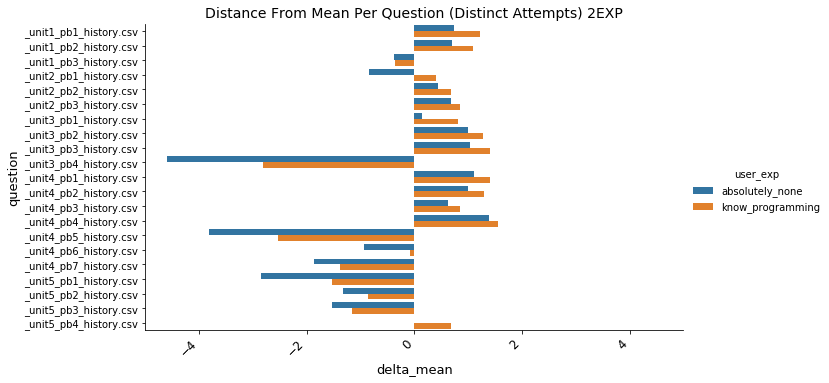

In [27]:
print("    *delta_mean (positive = less than num_distinct average / required fewer attempts)")
plt.figure(figsize=(15,10))

sns.catplot(x = 'delta_mean', y = 'question', hue = 'user_exp', 
            data = all_data_desc_distinct_2exp, kind = "bar", legend = True, aspect = 2)
plt.title("Distance From Mean Per Question (Distinct Attempts) 2EXP", fontsize = 14)
plt.xlabel('delta_mean', fontsize=13)
plt.ylabel('question', fontsize=13)
plt.xlim(-5,5)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='large'  
)

plt.show()

    *delta_mean (negative = greater than accuracy average / worse accuracy)


<Figure size 1080x720 with 0 Axes>

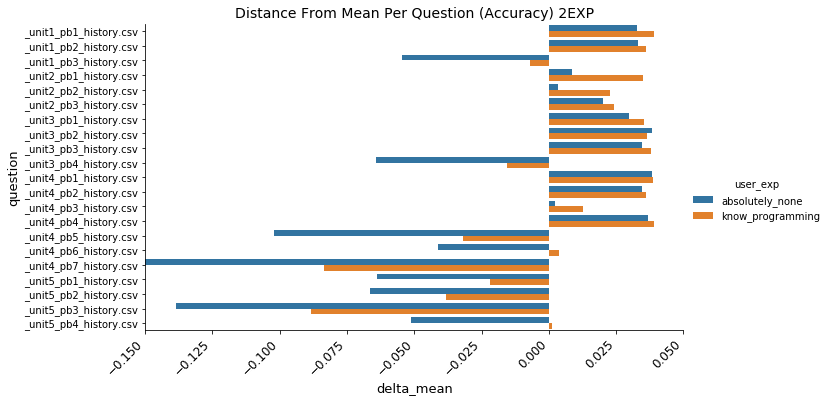

In [28]:
print("    *delta_mean (negative = greater than accuracy average / worse accuracy)")
plt.figure(figsize=(15,10))

sns.catplot(x = 'delta_mean', y = 'question', hue = 'user_exp', 
            data = all_data_desc_correct_2exp, kind = "bar", legend = True, aspect = 2)
plt.title("Distance From Mean Per Question (Accuracy) 2EXP", fontsize = 14)
plt.xlabel('delta_mean', fontsize=13)
plt.ylabel('question', fontsize=13)
plt.xlim(-.15,.05)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='large'  
)

plt.show()

# Significance Tests!